## **Transfer learning VGG 16 and VGG 19 using Keras**

In [50]:
!nvidia-smi

Tue Feb  7 11:07:59 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P0    28W /  70W |   9270MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [51]:
import tensorflow as tf
print(tf.__version__)

2.9.2


In [52]:
# importing the libraries 

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob


In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
# resize the image

IMAGE_SIZE = [224,224]
train_path = '/content/drive/MyDrive/Deep Learning/Flower classification/flowers/train'
valid_path = '/content/drive/MyDrive/Deep Learning/Flower classification/flowers/validation'

In [55]:
# importing the VGG16 library as shoen below and add preprocessing layer to fromt of VGG

vgg16 = VGG16(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)


In [56]:
for layer in vgg16.layers:
  layer.trainable = False

In [57]:
for layer in vgg16.layers:
  print(layer.name,layer.trainable)

input_2 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


In [58]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [59]:
folders = glob('/content/drive/MyDrive/Deep Learning/Flower classification/flowers/train/*')


In [60]:
folders

['/content/drive/MyDrive/Deep Learning/Flower classification/flowers/train/daisy',
 '/content/drive/MyDrive/Deep Learning/Flower classification/flowers/train/sunflower',
 '/content/drive/MyDrive/Deep Learning/Flower classification/flowers/train/dandelion',
 '/content/drive/MyDrive/Deep Learning/Flower classification/flowers/train/rose',
 '/content/drive/MyDrive/Deep Learning/Flower classification/flowers/train/tulip']

In [61]:
len(folders)

5

In [62]:
model = Sequential()

model.add(vgg16)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(5,activation = 'softmax'))

In [63]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 256)               6422784   
                                                                 
 dense_3 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 21,138,757
Trainable params: 6,424,069
Non-trainable params: 14,714,688
_________________________________________________________________


In [64]:
# model what cost and optimization to be used

model.compile(
    loss = 'categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [65]:
# use the image data generator to import the image from the dataset

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1. / 255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True

                                   )

# for the test image

test_datagen = ImageDataGenerator(rescale = 1./255)

In [66]:
# provide the same target size as initialized for the image size

training_set  = train_datagen.flow_from_directory('/content/drive/MyDrive/Deep Learning/Flower classification/flowers/train',
                                                  target_size = (224,224),
                                                  batch_size = 32,
                                                  class_mode = 'categorical'
                                                  )

Found 610 images belonging to 5 classes.


In [67]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Deep Learning/Flower classification/flowers/validation',
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 300 images belonging to 5 classes.


In [68]:
#fitting the model and running the cell

r = model.fit(
    training_set,
    validation_data = test_set,
    epochs = 30,
    steps_per_epoch = len(training_set),
    validation_steps = len(test_set)
    )

Epoch 1/30
20/20 [==============================] - 12s 577ms/step - loss: 4.6933 - accuracy: 0.3016 - val_loss: 1.0930 - val_accuracy: 0.6233
Epoch 2/30
20/20 [==============================] - 11s 548ms/step - loss: 1.0284 - accuracy: 0.5934 - val_loss: 0.8130 - val_accuracy: 0.7133
Epoch 3/30
20/20 [==============================] - 11s 525ms/step - loss: 0.6441 - accuracy: 0.7852 - val_loss: 1.4110 - val_accuracy: 0.5133
Epoch 4/30
20/20 [==============================] - 13s 634ms/step - loss: 0.6040 - accuracy: 0.7754 - val_loss: 0.8122 - val_accuracy: 0.6733
Epoch 5/30
20/20 [==============================] - 11s 560ms/step - loss: 0.4162 - accuracy: 0.8508 - val_loss: 0.7150 - val_accuracy: 0.7633
Epoch 6/30
20/20 [==============================] - 11s 559ms/step - loss: 0.3344 - accuracy: 0.9082 - val_loss: 0.7170 - val_accuracy: 0.7633
Epoch 7/30
20/20 [==============================] - 11s 552ms/step - loss: 0.2985 - accuracy: 0.9098 - val_loss: 0.8458 - val_accuracy: 0.7167

In [69]:
import matplotlib.pyplot as plt

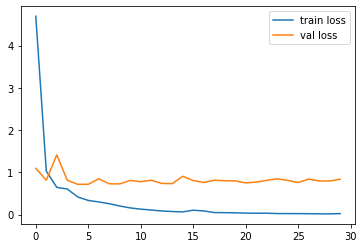

<Figure size 432x288 with 0 Axes>

In [70]:
# plot the loss
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='val loss')
plt.legend()
plt.show()
plt.savefig("lossVal_loss")

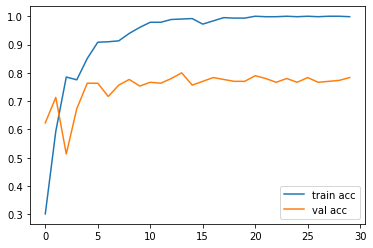

<Figure size 432x288 with 0 Axes>

In [71]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [72]:
# save it as a h5 file
from tensorflow.keras.models import load_model

model.save('model_vgg16.h5')

In [73]:
y_pred = model.predict(test_set)

10/10 [==============================] - 3s 234ms/step


In [74]:
y_pred

array([[9.9091876e-01, 2.0489309e-03, 1.7891171e-03, 5.1747952e-03,
        6.8339257e-05],
       [5.3857799e-05, 4.9066949e-07, 2.4755638e-02, 3.3003656e-05,
        9.7515702e-01],
       [1.4382780e-05, 9.9596280e-01, 8.2402534e-05, 3.9396626e-03,
        7.9440127e-07],
       ...,
       [7.1237463e-07, 2.7447813e-03, 2.2435594e-04, 9.9348891e-01,
        3.5413124e-03],
       [2.0083738e-03, 1.2646288e-01, 5.9639685e-02, 1.9837584e-02,
        7.9205149e-01],
       [2.6449893e-02, 6.7761849e-04, 4.7357962e-03, 9.6672910e-01,
        1.4075466e-03]], dtype=float32)

In [75]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [76]:
y_pred


array([0, 4, 1, 2, 2, 3, 2, 4, 2, 4, 2, 4, 3, 1, 1, 4, 1, 2, 3, 1, 1, 1,
       4, 1, 0, 3, 3, 4, 4, 0, 1, 4, 2, 4, 2, 1, 2, 3, 0, 2, 1, 3, 2, 4,
       1, 4, 2, 2, 4, 1, 1, 2, 0, 2, 1, 3, 4, 1, 3, 0, 4, 3, 2, 3, 1, 2,
       3, 3, 3, 0, 2, 1, 1, 2, 2, 1, 2, 4, 1, 3, 1, 2, 0, 1, 2, 4, 2, 2,
       2, 4, 3, 3, 2, 2, 0, 1, 4, 0, 4, 2, 3, 2, 2, 3, 2, 1, 0, 0, 4, 4,
       0, 2, 2, 4, 3, 3, 1, 4, 3, 2, 3, 2, 4, 2, 0, 3, 2, 4, 1, 1, 1, 1,
       2, 2, 2, 1, 4, 1, 4, 3, 0, 1, 3, 2, 3, 0, 1, 2, 1, 2, 3, 0, 2, 3,
       4, 2, 3, 4, 1, 3, 3, 2, 4, 2, 3, 4, 4, 2, 3, 0, 0, 2, 2, 1, 4, 3,
       3, 4, 2, 3, 4, 3, 2, 2, 1, 4, 0, 0, 0, 4, 3, 1, 0, 2, 2, 3, 3, 0,
       3, 3, 1, 0, 0, 0, 1, 1, 0, 2, 4, 3, 2, 1, 2, 2, 4, 1, 2, 0, 2, 4,
       2, 3, 3, 0, 2, 4, 4, 4, 4, 1, 4, 0, 0, 2, 0, 1, 0, 3, 4, 1, 0, 4,
       4, 4, 1, 2, 0, 0, 0, 4, 2, 1, 2, 2, 3, 1, 1, 4, 2, 2, 0, 0, 4, 1,
       0, 1, 1, 2, 3, 3, 2, 1, 3, 4, 0, 4, 0, 4, 4, 0, 4, 3, 0, 4, 4, 2,
       1, 3, 3, 3, 3, 0, 4, 2, 0, 1, 2, 3, 4, 3])

In [77]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [78]:
model=load_model('model_vgg16.h5')

In [79]:
img=image.load_img('/content/drive/MyDrive/Deep Learning/Flower classification/flowers/tupil_image.jpg',target_size=(224,224))

In [80]:
x=image.img_to_array(img)
x

array([[[221., 204.,   0.],
        [223., 206.,   2.],
        [223., 207.,   0.],
        ...,
        [ 31.,  62.,   2.],
        [ 35.,  65.,   1.],
        [ 36.,  66.,   2.]],

       [[220., 203.,   1.],
        [221., 204.,   2.],
        [222., 205.,   1.],
        ...,
        [ 30.,  61.,   1.],
        [ 34.,  64.,   2.],
        [ 34.,  64.,   2.]],

       [[218., 201.,   0.],
        [221., 204.,   3.],
        [220., 203.,   1.],
        ...,
        [ 30.,  61.,   1.],
        [ 35.,  65.,   5.],
        [ 32.,  62.,   2.]],

       ...,

       [[ 18.,  59.,   3.],
        [ 23.,  65.,   1.],
        [ 21.,  63.,   0.],
        ...,
        [ 90., 105.,   2.],
        [ 87., 104.,   0.],
        [ 86., 102.,   3.]],

       [[ 17.,  58.,   2.],
        [ 22.,  64.,   0.],
        [ 22.,  64.,   1.],
        ...,
        [ 89., 104.,   1.],
        [ 87., 104.,   0.],
        [ 84., 100.,   1.]],

       [[ 16.,  57.,   1.],
        [ 23.,  65.,   1.],
        [ 26.,  

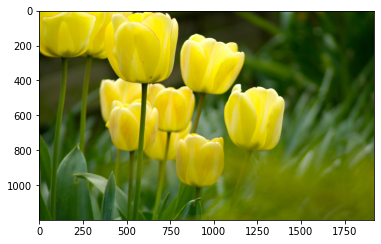

In [81]:
Z = plt.imread('/content/drive/MyDrive/Deep Learning/Flower classification/flowers/tupil_image.jpg')
plt.imshow(Z)

In [82]:
x.shape

(224, 224, 3)

In [83]:
x=x/255

In [84]:
from keras.applications.vgg16 import preprocess_input
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [85]:
model.predict(img_data)

1/1 [==============================] - 0s 147ms/step


array([[8.6478317e-01, 4.9228467e-02, 6.2609419e-02, 2.3378987e-02,
        4.7058553e-08]], dtype=float32)

In [86]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 18ms/step


In [87]:
a

array([0])

In [91]:
flower_name = ['tulip',
 'sunflower',
 'dandelion',
 'daisy',
 'rose']

In [92]:
folders[a[0]]

'/content/drive/MyDrive/Deep Learning/Flower classification/flowers/train/daisy'

In [93]:
flower_name[a[0]]

'tulip'